# Lab: Titanic Survival Exploration with Decision Trees

## Getting Started
In this lab, you will see how decision trees work by implementing a decision tree in sklearn.

We'll start by loading the dataset and displaying some of its rows.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Set a random seed
import random
random.seed(42)

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Recall that these are the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [2]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
features_raw = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(features_raw.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

## Preprocessing the data

Now, let's do some data preprocessing. First, we'll one-hot encode the features.

In [3]:
features = pd.get_dummies(features_raw)

And now we'll fill in any blanks with zeroes.

In [4]:
features = features.fillna(0.0)
display(features.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## (TODO) Training the model

Now we're ready to train a model in sklearn. First, let's split the data into training and testing sets. Then we'll train the model on the training set.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [6]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier().fit(X_train, y_train)

## Testing the model
Now, let's see how our model does, let's calculate the accuracy over both the training and the testing set.

In [7]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.8156424581005587


# Exercise: Improving the model

Ok, high training accuracy and a lower testing accuracy. We may be overfitting a bit.

So now it's your turn to shine! Train a new model, and try to specify some parameters in order to improve the testing accuracy, such as:
- `max_depth`
- `min_samples_leaf`
- `min_samples_split`

You can use your intuition, trial and error, or even better, feel free to use Grid Search!

**Challenge:** Try to get to 85% accuracy on the testing set. If you'd like a hint, take a look at the solutions notebook next.

To attempt to get to 85% accuracy, we will visualize what the effects are of each parameter to the train and test accuracy.

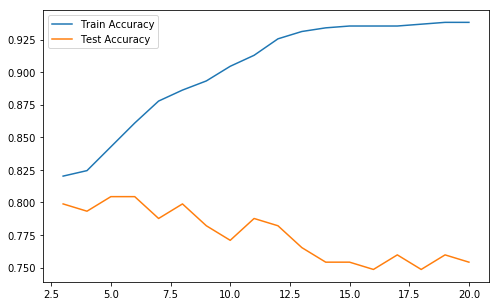


The highest test accuracy occured when max_depth was at 5.


In [8]:
# TODO: Train the model
import matplotlib.pyplot as plt
%matplotlib inline

max_depth        = np.arange(3, 21)
min_samples_leaf = np.arange(2, 21)
min_samples_split= np.arange(2, 21)

train_accuracies = []
test_accuracies  = []

for i in max_depth:
    model2 = DecisionTreeClassifier(max_depth         = i,
                                    min_samples_leaf  = 2,
                                    min_samples_split = 2).fit(X_train, y_train)

    # TODO: Make predictions
    y_train_pred = model2.predict(X_train)
    y_test_pred  = model2.predict(X_test)

    # TODO: Calculate the accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy  = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
highest_test = max_depth[test_accuracies.index(max(test_accuracies))]

plt.figure(figsize = (8, 5))
plt.plot(max_depth, train_accuracies, label = "Train Accuracy")
plt.plot(max_depth, test_accuracies, label = "Test Accuracy")
plt.legend()
plt.show()

print("")
print(f"The highest test accuracy occured when max_depth was at {highest_test}.")

The max depth refers to the depth of the decision tree. Increasing the depth increases the train accuracy but decreases the test accuracy. This means **higher max_depth leades to model overfitting**.

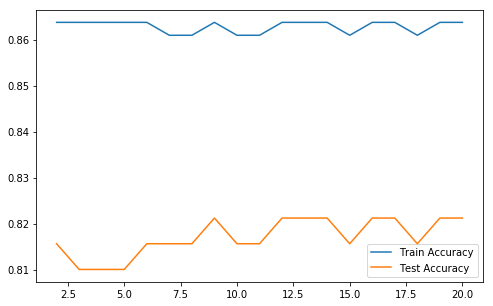


The highest test accuracy occured when min_samples_split was at 9.


In [9]:
train_accuracies = []
test_accuracies  = []

for i in min_samples_split:
    model2 = DecisionTreeClassifier(max_depth         = 6,
                                    min_samples_leaf  = 2,
                                    min_samples_split = i).fit(X_train, y_train)

    # TODO: Make predictions
    y_train_pred = model2.predict(X_train)
    y_test_pred  = model2.predict(X_test)

    # TODO: Calculate the accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy  = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
highest_test = min_samples_split[test_accuracies.index(max(test_accuracies))]

plt.figure(figsize = (8, 5))
plt.plot(min_samples_split, train_accuracies, label = "Train Accuracy")
plt.plot(min_samples_split, test_accuracies, label = "Test Accuracy")
plt.legend()
plt.show()

print("")
print(f"The highest test accuracy occured when min_samples_split was at {highest_test}.")

The min_samples_split defines how many samples a node must have before it can be split. We notice that this value plateaus to a certain value.

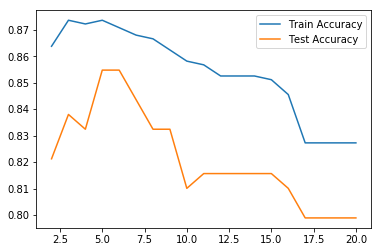


The highest test accuracy occured when min_samples_leaf was at 5.


In [10]:
min_samples_leaf = np.arange(2, 21)

train_accuracies = []
test_accuracies  = []

for i in min_samples_leaf:
    model2 = DecisionTreeClassifier(max_depth         = 6,
                                    min_samples_leaf  = i,
                                    min_samples_split = 7).fit(X_train, y_train)

    # TODO: Make predictions
    y_train_pred = model2.predict(X_train)
    y_test_pred  = model2.predict(X_test)

    # TODO: Calculate the accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy  = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

highest_test = min_samples_leaf[test_accuracies.index(max(test_accuracies))]    

plt.plot(min_samples_leaf, train_accuracies, label = "Train Accuracy")
plt.plot(min_samples_leaf, test_accuracies, label = "Test Accuracy")
plt.legend()
plt.show()

print("")
print(f"The highest test accuracy occured when min_samples_leaf was at {highest_test}.")

The min_samples_leaf defines how many samples should be present in a leaf. Increasing the min_samples_leaf causes the train and test accuracy to decrease. However, we do notice that the test accuracy spiked at one time. The accuracies tell us that **bigger the min_samples_leaf leads to underfitting** as the model doesn't perform very well in prediction.

In [11]:
model2 = DecisionTreeClassifier(max_depth         = 6,
                                min_samples_leaf  = 5,
                                min_samples_split = 7).fit(X_train, y_train)

# TODO: Make predictions
y_train_pred = model2.predict(X_train)
y_test_pred  = model2.predict(X_test)

# TODO: Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy  = accuracy_score(y_test, y_test_pred)

train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.8735955056179775
The test accuracy is 0.8547486033519553


With our tests, we identify that max_depth = 6, min_samples_leaf = 5, and min_samples_split = 7 produces the best test accuracy. We do recognize that our methodologies isolate each variable so there are combinations that we skipped that might produce better results. However, our model has a test accuracy of **85.47%**.

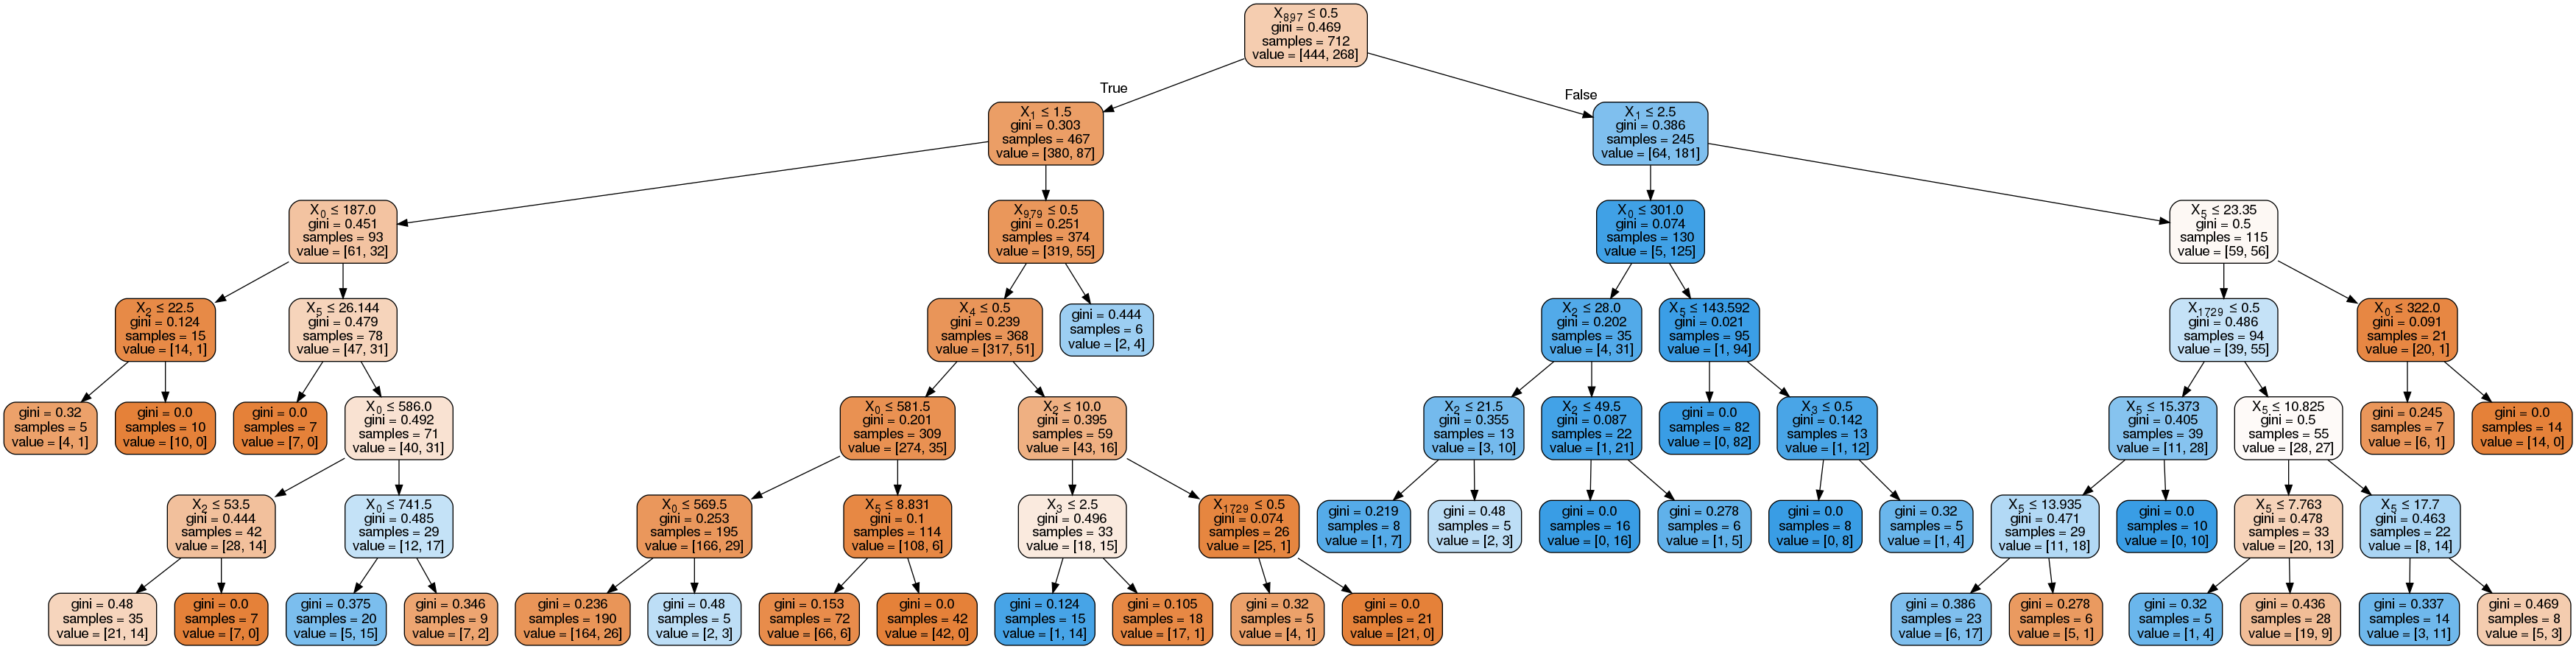

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

An interesting information that surfaces here is the very first node asks if the value of Feature 897 is greater than or equal to 0.5. Feature 897 refers to **Sex_female**. This means a major feature in the dataset is if the passenger is male or female.